In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
with open('train_df_std') as f:
    X_train=pd.read_csv(f)

In [22]:
X_train.Cancer.sum()/len(X_train.Cancer)*100

11.354780782001763

In [23]:
s_scores=np.array([0.18499973739036046,
 0.11695013810146823,
 0.20188101487314086,
 0.080753723092931,
 0.031137521222410865,
 0.08854277789630893,
 0.07519851773425093,
 0.20348394120849211,
 0.16700043193151923,
 0.014478090144780902])*100

Text(0, 0.5, 'Cancer Rate')

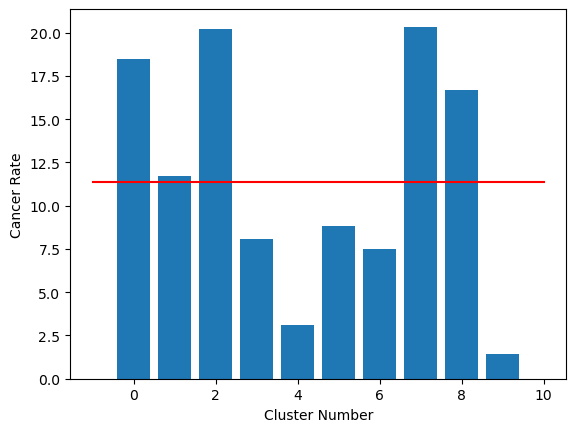

In [27]:
plt.bar(list(np.arange(10)),s_scores)
plt.plot(np.linspace(-1,10,100),np.ones(100)*11.35,color='red')
plt.xlabel("Cluster Number")
plt.ylabel("Cancer Rate")


In [1]:
# values acquired from Clustering notebook

kmeans_sil=[0.14845809590997555,0.14071196401267336,0.09136555449786156,0.0848647169492368,0.10139634994462915,0.09600249696319915,0.07388673167849331,\
  0.08623306727333453,0.08662793261613963,0.07623884433323888,0.07593484868942856]
kmeans_db=[2.5271553419653925,2.298009839437643,2.42284145474288,2.304835532338005,2.173453014771115,2.1620000280912346,2.1268801723174047,\
           2.052253298621979,2.0064921953597405,2.1189821259786075,2.278282159225411]
kmeans_ch=[50195.42902457939,39072.68169559474,34460.40655359041,32390.940440474067,30916.153021324564,27979.67204857384,26339.789009836237,\
           24953.10302644066,23337.426406678005,22269.82199962306,20695.679233375937]

ac_sil=[0.08211701905989412,0.08473679005431885,0.09076583608028277,0.09543171795822326,0.05705645295330608,0.03717906037408408,0.04663522271856349,\
        0.0628275243239851,0.06920644900880353,0.04259119821655351,0.05472384813808576]
ac_db=[3.4646500455593023,2.8794410764682037,2.52572513967907,2.2679409736121032,2.5570631087319744,2.5070816556690105,2.4733325544094122,\
       2.3024955330054437,2.2501168708895127,2.265086143871992,2.3394051283250827]
ac_ch=[3391.5359910315615,3349.4647871267252,3255.422898075652,3246.540273586324,2970.777571451951,2724.989226623972,2521.058425347685,\
       2367.2723846987096,2248.621295099417,2155.9960873322316,2081.5884581923156]

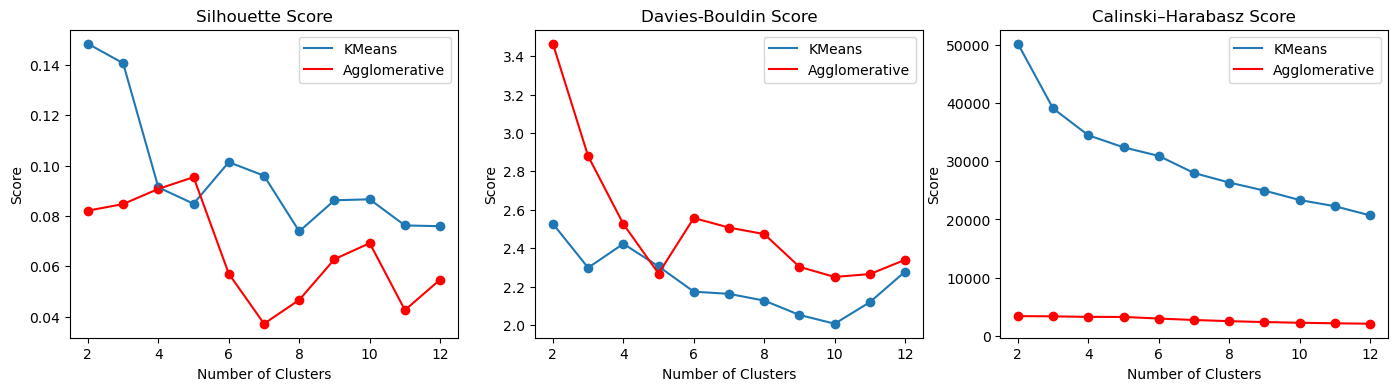

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(17, 4))

# apologies for the unneat code

axs[0].plot(np.arange(2,13),kmeans_sil)
axs[0].plot(np.arange(2,13),ac_sil,color='red')
axs[0].scatter(np.arange(2,13),kmeans_sil)
axs[0].scatter(np.arange(2,13),ac_sil,color='red')
axs[0].title.set_text('Silhouette Score')
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('Score')
axs[0].legend(["KMeans","Agglomerative"])
axs[1].plot(np.arange(2,13),kmeans_db)
axs[1].plot(np.arange(2,13),ac_db,color='red')
axs[1].scatter(np.arange(2,13),kmeans_db)
axs[1].scatter(np.arange(2,13),ac_db,color='red')
axs[1].title.set_text('Davies-Bouldin Score')
axs[1].set_xlabel('Number of Clusters')
axs[1].set_ylabel('Score')
axs[1].legend(["KMeans","Agglomerative"])
axs[2].plot(np.arange(2,13),kmeans_ch)
axs[2].plot(np.arange(2,13),ac_ch,color='red')
axs[2].scatter(np.arange(2,13),kmeans_ch)
axs[2].scatter(np.arange(2,13),ac_ch,color='red')
axs[2].title.set_text('Calinski–Harabasz Score')
axs[2].set_xlabel('Number of Clusters')
axs[2].set_ylabel('Score')
axs[2].legend(["KMeans","Agglomerative"])
plt.savefig('cluster_eval')

In [15]:
with open('cluster_df') as f:
    cluster_df=pd.read_csv(f)

In [17]:
cluster_df=cluster_df.set_index('Unnamed: 0').T

In [22]:
with open('train_df') as f:
    X=pd.read_csv(f)

In [23]:
avgs=X.sum()/len(X)
avgs

Gender                                           0.470316
Age Group                                        7.618454
Num of Bad Mental Health Days                    4.396691
Could Afford Doctor                              0.083758
Years Since Last Checkup                         1.344971
Exercise in Past 30 Days                         0.760578
Hours of Sleeping                                7.022121
Heart Attack                                     0.056909
Heart Disease                                    0.061352
Stroke                                           0.043332
Asthma                                           0.150147
Depression                                       0.207432
Kidney Disease                                   0.046021
Arthritis                                        0.340895
Diabetes                                         0.137801
Married                                          0.517212
Deaf                                             0.090749
Blind         

In [25]:
# I noticed that the percentage of those using smokeless tobacco is 98% in our dataset,and realized this is because 
# of an error in the data extraction code for that column. Because it is late in the project life cycle and fixing this would require
# rerunning a lot of code, we feel it is wise to just leave that column as is and just consider it a useless noise column which will likely be removed
# during ablation.

347089.7920772097

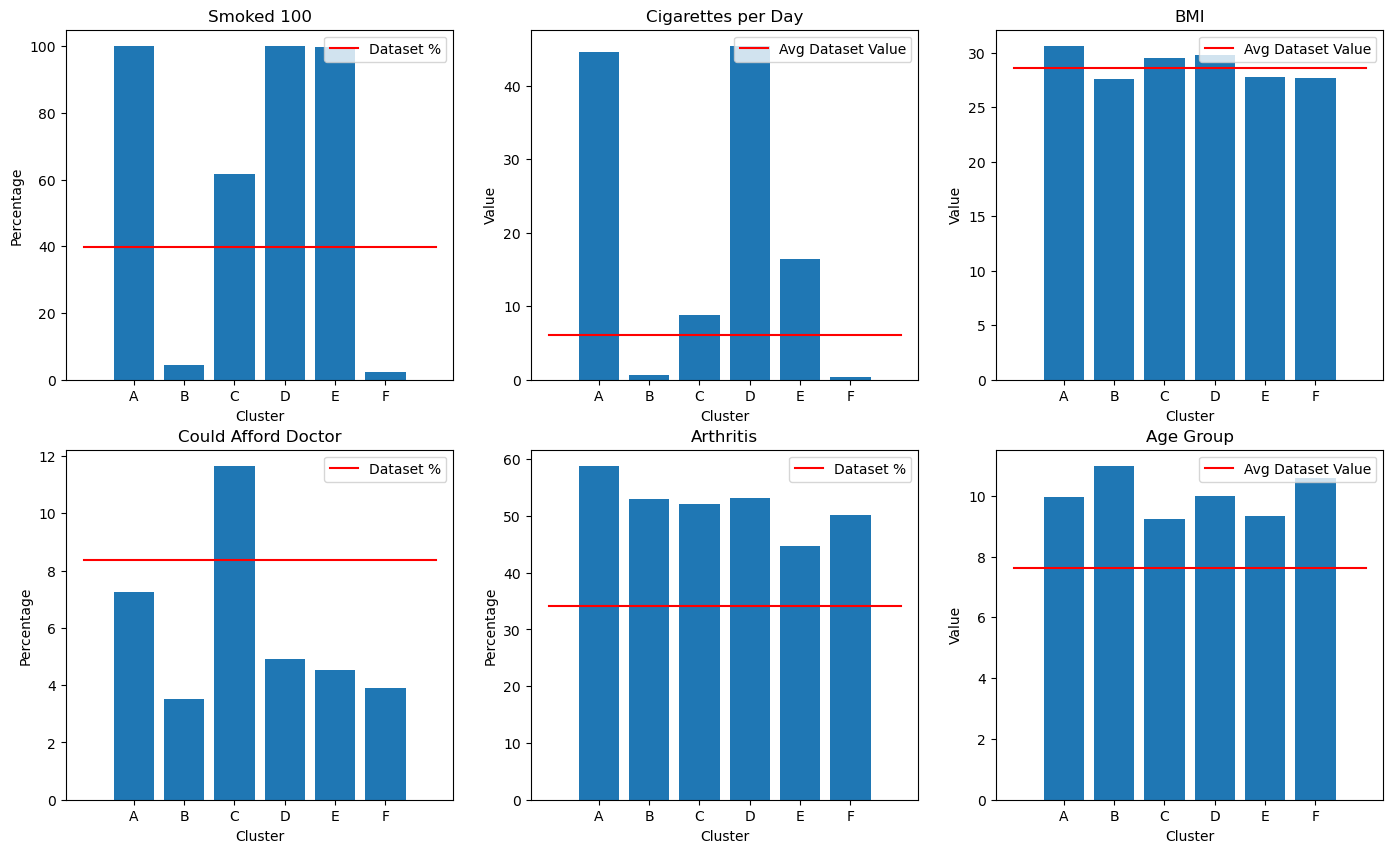

In [60]:
fig, axs = plt.subplots(2, 3, figsize=(17, 10))
feats = ['Smoked 100','Cigarettes per Day','BMI','Could Afford Doctor','Arthritis','Age Group']
y_labels = []
index = 0
average_feats=avgs[feats]

for i in range(2):
    for j in range(3):
        if (index==0) or (index==3) or (index==4):
            label='Percentage'
            scalar=100
            legend_label = 'Dataset %'
        else:
            label='Value'
            scalar=1
            legend_label = 'Avg Dataset Value'
        axs[i,j].bar(np.arange(6),cluster_df[feats[index]]*scalar)
        axs[i,j].plot(np.linspace(-1,6,100), np.ones(100)*average_feats[feats[index]]*scalar, color='red')
        axs[i,j].set_xlabel('Cluster')
        axs[i,j].set_ylabel(label)
        axs[i,j].legend([legend_label])
        axs[i,j].set_xticks([0,1,2,3,4,5],['A','B','C','D','E','F'])
        axs[i,j].set_title(feats[index])
        index+=1
plt.savefig('Cluster_features')